In [1]:
import jax
import numpyro
import numpyro.distributions as dist
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from numpyro.infer import MCMC
from numpyro.infer.hug import Hug
from numpyro.infer.hop import Hop
from numpyro.infer.alternator import Alternator
from numpyro.infer.initialization import init_to_value

numpyro.enable_x64(True)

In [2]:
def banana(bananicity=0.75):
    x = numpyro.sample('x', dist.Normal(0, 1))
    y = numpyro.sample('y', dist.Normal(bananicity * (x**2 - 1.0), np.sqrt(1.0 - bananicity**2)))

In [3]:
kernel = Hop(banana, lam=4.0, mu=2.0, init_strategy=init_to_value(None, values={'x':1.0, 'y':-2.0}))
rng_key = jax.random.PRNGKey(0)
mcmc = MCMC(kernel, num_warmup=0, num_samples=10000, num_chains=1)
mcmc.run(rng_key, extra_fields=('potential_energy','accept_prob'))

sample: 100%|██████████| 10000/10000 [00:04<00:00, 2099.72it/s]


In [4]:
samples = mcmc.get_samples()

([<matplotlib.lines.Line2D at 0x7fec150b1a60>],
 [<matplotlib.lines.Line2D at 0x7febd00fc220>])

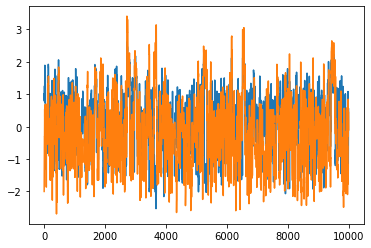

In [5]:
plt.plot(samples["x"]), plt.plot(samples["y"])

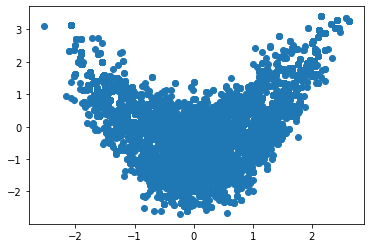

In [6]:
plt.scatter(x=samples["x"], y=samples["y"])

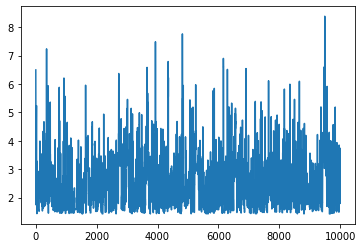

In [7]:
pe = mcmc.get_extra_fields()['potential_energy']
plt.plot(pe)

(array([6749.,  276.,  263.,  270.,  265.,  219.,  220.,  192.,  191.,
        1355.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

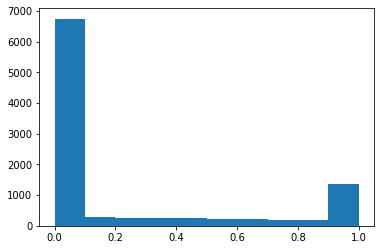

In [8]:
ap = mcmc.get_extra_fields()['accept_prob']
plt.hist(ap, range=(0,1))